# Atividade 1 da Disciplica de Machine Learning
## Alunos - Matrícula: 
    Gabriel Miranda - 202100011430
    Rafael Takeguma - 202100011833
    Arthur Santos   - 202000012560
## Etapa 1: Pré-processamento dos dados

Abrindo o dataset em um dataframe pandas

In [1]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df = df.dropna()
df.head()

,curriculum_id,student_id,centro,department_name,course_name,student_age_at_initial_period,birthday,birth_place,ingress_form,locks_number,...,optative_ch_progress,curriculum_status,leaving_reason,mc,course_mc,iepl,course_iepl,iech,course_iech,iea
0,122,97,CCET,DCOMP,CIÊNCIA DA COMPUTAÇÃO,30,1964-05-14,PORTO ALEGRE/RS,TRANSFERÊNCIA COMPULSÓRIA,0,...,100.0,CANCELADO,DECURSO DE PRAZO MÁXIMO P/ CONCLUSÃO DE CURSO,1.79,4.537049,0.300,0.476704,0.300,0.530138,0.1611
1,215,167,CCET,DCOMP,CIÊNCIA DA COMPUTAÇÃO,18,1980-05-11,ARACAJU/SE,VESTIBULAR,0,...,100.0,CANCELADO,ABANDONO,6.69,4.537049,0.300,0.476704,0.367,0.530138,0.7366
2,348,285,CCET,DCOMP,CIÊNCIA DA COMPUTAÇÃO,19,1983-10-26,ARACAJU/SE,VESTIBULAR,0,...,100.0,CANCELADO,ABANDONO,6.66,4.537049,0.300,0.476704,0.446,0.530138,0.8911
3,352,289,CCET,DCOMP,CIÊNCIA DA COMPUTAÇÃO,21,1981-08-08,RIO DE JANEIRO/RJ,VESTIBULAR,0,...,100.0,CANCELADO,ABANDONO,6.71,4.537049,0.300,0.476704,0.411,0.530138,0.8273
4,414,351,CCET,DCOMP,CIÊNCIA DA COMPUTAÇÃO,18,1986-02-10,ARACAJU/SE,VESTIBULAR,0,...,100.0,CONCLUÍDO,CONCLUÍDO,6.55,4.537049,0.325,0.476704,0.429,0.530138,0.9132


Exibindo informações gerais sobre o dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1514 entries, 0 to 2535
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   curriculum_id                  1514 non-null   int64  
 1   student_id                     1514 non-null   int64  
 2   centro                         1514 non-null   object 
 3   department_name                1514 non-null   object 
 4   course_name                    1514 non-null   object 
 5   student_age_at_initial_period  1514 non-null   int64  
 6   birthday                       1514 non-null   object 
 7   birth_place                    1514 non-null   object 
 8   ingress_form                   1514 non-null   object 
 9   locks_number                   1514 non-null   int64  
 10  required_ch_progress           1514 non-null   float64
 11  optative_ch_progress           1514 non-null   float64
 12  curriculum_status              1514 non-null   object

Exibindo as colunas numéricas do dataset

In [3]:
df.describe()

,curriculum_id,student_id,student_age_at_initial_period,locks_number,required_ch_progress,optative_ch_progress,mc,course_mc,iepl,course_iepl,iech,course_iech,iea
count,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000,1514.000000
mean,2074.133421,1845.038309,21.842140,0.219287,41.029212,41.055702,4.100271,4.591109,0.445141,0.481572,0.477109,0.533039,1.541577
std,737.974055,689.459947,5.357002,0.480414,38.778900,42.886161,2.769070,0.065437,0.213704,0.018419,0.225883,0.011215,2.098772
min,122.000000,55.000000,16.000000,0.000000,0.000000,0.000000,0.000000,4.537049,0.300000,0.461930,0.300000,0.521000,0.000000
25%,1505.250000,1321.000000,18.000000,0.000000,5.263158,0.000000,1.432500,4.537049,0.300000,0.461930,0.300000,0.521000,0.128925
50%,2120.500000,1881.500000,20.000000,0.000000,27.631579,21.428571,4.530000,4.586078,0.300000,0.476704,0.332000,0.530138,0.538100
75%,2617.250000,2351.750000,23.000000,0.000000,86.746162,100.000000,6.590000,4.697231,0.556000,0.511211,0.641500,0.551049,2.319300
max,3923.000000,3382.000000,54.000000,2.000000,100.000000,100.000000,9.390000,4.697231,1.100000,0.511211,1.000000,0.551049,10.329000


Inicialmente, removeremos colunas que não se mostram importantes para a predição da evasão, como: matrícula, data de nascimento, local de nascimento, id do estudante, centro e nome do departamento.
Outros campos podem ser removidos posteriormente, depois de análises mais detalhadas.

In [4]:
df = df.drop(columns=['curriculum_id', 'student_id', 'centro', 'department_name', 'birthday', 'birth_place'])
df.head()

,course_name,student_age_at_initial_period,ingress_form,locks_number,required_ch_progress,optative_ch_progress,curriculum_status,leaving_reason,mc,course_mc,iepl,course_iepl,iech,course_iech,iea
0,CIÊNCIA DA COMPUTAÇÃO,30,TRANSFERÊNCIA COMPULSÓRIA,0,46.052632,100.0,CANCELADO,DECURSO DE PRAZO MÁXIMO P/ CONCLUSÃO DE CURSO,1.79,4.537049,0.300,0.476704,0.300,0.530138,0.1611
1,CIÊNCIA DA COMPUTAÇÃO,18,VESTIBULAR,0,95.348837,100.0,CANCELADO,ABANDONO,6.69,4.537049,0.300,0.476704,0.367,0.530138,0.7366
2,CIÊNCIA DA COMPUTAÇÃO,19,VESTIBULAR,0,97.674419,100.0,CANCELADO,ABANDONO,6.66,4.537049,0.300,0.476704,0.446,0.530138,0.8911
3,CIÊNCIA DA COMPUTAÇÃO,21,VESTIBULAR,0,100.000000,100.0,CANCELADO,ABANDONO,6.71,4.537049,0.300,0.476704,0.411,0.530138,0.8273
4,CIÊNCIA DA COMPUTAÇÃO,18,VESTIBULAR,0,100.000000,100.0,CONCLUÍDO,CONCLUÍDO,6.55,4.537049,0.325,0.476704,0.429,0.530138,0.9132


Agora, verificaremos a importância das colunas restantes utilizando o feature_importances_ do RandomForestClassifier.
Para os dados não-numéricos, devemos utilizar o one_hot_encoding (get_dummies) da própria biblioteca pandas, apra discretizar essas colunas.

In [5]:
from sklearn.ensemble import RandomForestClassifier

# Aplicação do one_hot_encoding nas colunas não-numéricas
numericas = df.select_dtypes(include=['int64', 'float64']).columns
nominal = df.select_dtypes(include=['object']).columns
nominal = nominal.drop(['leaving_reason'])
nominal_encoded_df = pd.get_dummies(df[nominal], drop_first=True)

df_encoded = pd.concat([df[numericas], nominal_encoded_df, df['leaving_reason']], axis=1)

# Separação do dataframe em features (somente numéricas) e target
X = df_encoded.drop(columns=['leaving_reason'])
y = df_encoded['leaving_reason']

X

,student_age_at_initial_period,locks_number,required_ch_progress,optative_ch_progress,mc,course_mc,iepl,course_iepl,iech,course_iech,iea,course_name_ENGENHARIA DE COMPUTAÇÃO,course_name_SISTEMAS DE INFORMAÇÃO,ingress_form_READMISSÃO,ingress_form_SUB JUDICE,ingress_form_TRANSFERÊNCIA COMPULSÓRIA,ingress_form_TRANSFERÊNCIA INTERNA,ingress_form_TRANSFERÊNCIA VOLUNTÁRIA,ingress_form_VESTIBULAR,curriculum_status_CONCLUÍDO
0,30,0,46.052632,100.000000,1.79,4.537049,0.300,0.476704,0.300,0.530138,0.1611,False,False,False,False,True,False,False,False,False
1,18,0,95.348837,100.000000,6.69,4.537049,0.300,0.476704,0.367,0.530138,0.7366,False,False,False,False,False,False,False,True,False
2,19,0,97.674419,100.000000,6.66,4.537049,0.300,0.476704,0.446,0.530138,0.8911,False,False,False,False,False,False,False,True,False
3,21,0,100.000000,100.000000,6.71,4.537049,0.300,0.476704,0.411,0.530138,0.8273,False,False,False,False,False,False,False,True,False
4,18,0,100.000000,100.000000,6.55,4.537049,0.325,0.476704,0.429,0.530138,0.9132,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,30,1,7.291667,0.000000,5.13,4.697231,0.551,0.511211,0.318,0.551049,0.8989,True,False,False,False,False,False,False,True,False
2510,19,0,22.916667,0.000000,6.39,4.697231,0.577,0.511211,0.786,0.551049,2.8980,True,False,False,False,False,False,False,True,False
2516,19,0,28.125000,42.857143,6.86,4.697231,0.984,0.511211,0.886,0.551049,5.9807,True,False,False,False,False,False,False,True,False
2524,18,0,2.083333,0.000000,0.00,4.697231,0.300,0.511211,0.300,0.551049,0.0000,True,False,False,False,False,False,False,True,False


In [6]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X,y)

# Dataframe da importância
importancia = pd.DataFrame({'Variável': X.columns, 'Importância': clf.feature_importances_})
importancia = importancia.sort_values(by="Importância", ascending=False)
importancia

,Variável,Importância
2,required_ch_progress,0.203043
10,iea,0.129805
3,optative_ch_progress,0.118656
4,mc,0.113563
19,curriculum_status_CONCLUÍDO,0.108995
0,student_age_at_initial_period,0.086005
8,iech,0.075262
6,iepl,0.073494
1,locks_number,0.026785
9,course_iech,0.013194


É possível observar que as colunas de locks_number pra baixo possuem pouca importância na predição do modelo (menos que 5%). Logo, removeremos essas colunas, visando simplificar o modelo.

In [7]:
df_encoded = df_encoded.drop(columns=['locks_number', 'course_iepl', 'course_iech', 'course_mc', 'ingress_form_VESTIBULAR', 'course_name_ENGENHARIA DE COMPUTAÇÃO',
                                      'ingress_form_TRANSFERÊNCIA INTERNA', 'course_name_SISTEMAS DE INFORMAÇÃO', 'ingress_form_TRANSFERÊNCIA COMPULSÓRIA', 
                                      'ingress_form_TRANSFERÊNCIA VOLUNTÁRIA', 'ingress_form_READMISSÃO', 'ingress_form_SUB JUDICE'])
df_encoded.head()

,student_age_at_initial_period,required_ch_progress,optative_ch_progress,mc,iepl,iech,iea,curriculum_status_CONCLUÍDO,leaving_reason
0,30,46.052632,100.0,1.79,0.300,0.300,0.1611,False,DECURSO DE PRAZO MÁXIMO P/ CONCLUSÃO DE CURSO
1,18,95.348837,100.0,6.69,0.300,0.367,0.7366,False,ABANDONO
2,19,97.674419,100.0,6.66,0.300,0.446,0.8911,False,ABANDONO
3,21,100.000000,100.0,6.71,0.300,0.411,0.8273,False,ABANDONO
4,18,100.000000,100.0,6.55,0.325,0.429,0.9132,True,CONCLUÍDO


Após remoção inicial, utilizamos a função hist() para vizualizar os dados numéricos em forma de histograma.

Dessa forma verificamos a distribuição dos dados e suas escalas.

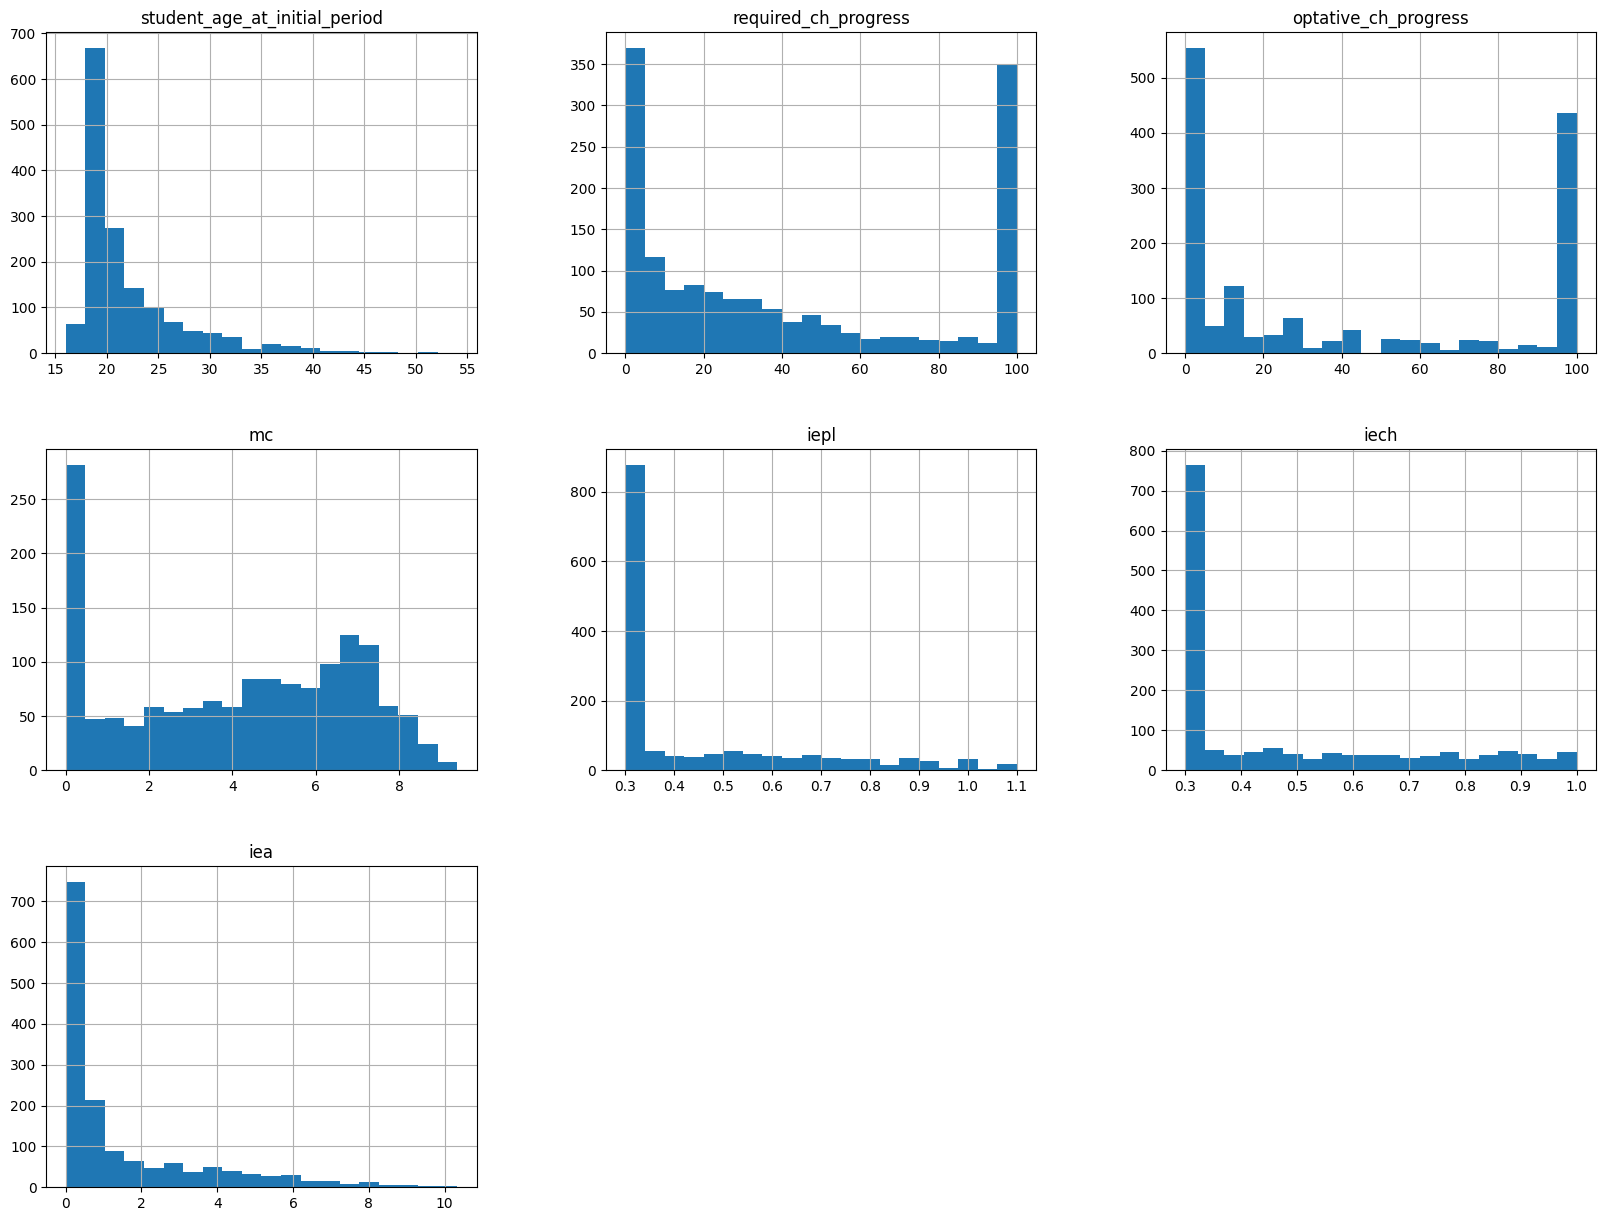

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

df_encoded.hist(bins=20, figsize=(20,15))
plt.show()

É possível observar que há uma descrepância na distibuição desses dados, com o iepl, por exemplo, indo de 0.3 até 1.1 enquanto o required_ch_progress vai de 0 a 100.
Portanto, devemos aplicar alguma técnica de normalização nesses dados.
Primeiro, separamos o dataset em treino e teste.

In [9]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['leaving_reason'])
y = df_encoded['leaving_reason']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
df_encoded['leaving_reason'].unique()

array(['DECURSO DE PRAZO MÁXIMO P/ CONCLUSÃO DE CURSO', 'ABANDONO',
       'CONCLUÍDO',
       'Não atendeu à convocação para o Cadastro Específico conforme Edital 21/2017/PROGRAD',
       'CANCELAMENTO ESPONTÂNEO', 'CANC.. NOVO VESTIBULAR',
       'Transferência Interna', 'TRANSF.P/OUTRA IES',
       'CADASTRO CANCELADO', 'NÃO CONFIRMAÇÃO VÍNCULO'], dtype=object)

### Etapa 2 - Seleção de modelo
Verificando a acuracia do RandomForestClassifier que já foi treinado

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_class)
print(f"Acurácia: {accuracy:.2f}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_class))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_class))


Acurácia: 0.67
Relatório de Classificação:
                                                                                     precision    recall  f1-score   support

                                                                           ABANDONO       0.62      0.90      0.74       138
                                                                 CADASTRO CANCELADO       1.00      1.00      1.00         1
                                                             CANC.. NOVO VESTIBULAR       0.20      0.04      0.06        27
                                                            CANCELAMENTO ESPONTÂNEO       0.00      0.00      0.00        20
                                                                          CONCLUÍDO       1.00      1.00      1.00        67
                                      DECURSO DE PRAZO MÁXIMO P/ CONCLUSÃO DE CURSO       0.40      0.12      0.18        17
                                                            NÃO CONFIRMAÇÃO VÍNCU

c:\Users\rafae\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rafae\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\rafae\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Etapa 3 - Realizando o ajuste fino (fine-tune) do modelo Random Forest Classifier
#### Grid Search
A técnica do Grid Search visa encontrar uma boa combinação dos hiperparâmetros para o melhor desempenho do modelo.
Com o GridSearchCV do Scikit-Learn, é possível passar quais hiperparâmetros pretende-se ajustar e quais valores para os mesmos pretende-se testar.

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

grid_search = GridSearchCV(clf, 
                           param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)

grid_search.fit(X_train, y_train)

c:\Users\rafae\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 40, 50, 60, 70, 80, 90,
                                           100, 200, 300]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [21]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

Como pode-se observar, a melhor combinação dos hiperparâmetros foi no máximo duas features usadas para escolher a melhor divisão dos dados e 30 árvores de decisão.

Agora vamos converter y para valores numericos e usar a regressão linear:

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalizando os dados
scaler = StandardScaler()


# Codificação de 'leaving_reason' para números
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(df['leaving_reason'])

# Separação do dataframe em features (somente numéricas) e target
X = df_encoded.drop(columns=['leaving_reason'])
y = y_numeric  # Agora 'y' é a versão numérica

# Separando os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustando e transformando os dados de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Transformando os dados de teste
X_test_scaled = scaler.transform(X_test)

# Criando o modelo
modelo = LinearRegression()

# Treinando o modelo
modelo.fit(X_train_scaled, y_train)

# Fazendo previsões
y_pred = modelo.predict(X_test_scaled)

# Calculando as métricas
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

# Exibindo os resultados
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 5.45
Root Mean Squared Error (RMSE): 2.33
R² Score: 0.32


Agora vamos usar DecisonTreeRegressor:

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Normalizando os dados
scaler = StandardScaler()

# Ajustando e transformando os dados de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Transformando os dados de teste
X_test_scaled = scaler.transform(X_test)

# Criando o modelo de árvore de decisão para regressão
modelo_tree = DecisionTreeRegressor(random_state=42)

# Ajustando o modelo aos dados de treinamento
modelo_tree.fit(X_train_scaled, y_train)

# Fazendo previsões sobre os dados de teste
y_pred_tree = modelo_tree.predict(X_test_scaled)

# Calculando as métricas de avaliação
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = mse_tree**0.5
r2_tree = r2_score(y_test, y_pred_tree)

# Exibindo as métricas
print(f"Mean Squared Error (MSE): {mse_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree:.2f}")
print(f"R² Score: {r2_tree:.2f}")


Mean Squared Error (MSE): 12.59
Root Mean Squared Error (RMSE): 3.55
R² Score: -0.58


Vamos testar agora o RandomForestetRegressor:

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Normalizando os dados
scaler = StandardScaler()

# Ajustando e transformando os dados de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Transformando os dados de teste
X_test_scaled = scaler.transform(X_test)

# Instanciar o modelo RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
rf_model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred_rf = rf_model.predict(X_test_scaled)

# Calcular as métricas de avaliação
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf**0.5
r2_rf = r2_score(y_test, y_pred_rf)

# Exibir os resultados
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Random Forest - R² Score: {r2_rf:.2f}")

Random Forest - Mean Squared Error (MSE): 5.55
Random Forest - Root Mean Squared Error (RMSE): 2.36
Random Forest - R² Score: 0.31


Vamos usar o KNeighborsRegressor agora:

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Normalizando os dados
scaler = StandardScaler()

# Ajustando e transformando os dados de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Transformando os dados de teste
X_test_scaled = scaler.transform(X_test)

# Instanciar o modelo KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)

# Treinar o modelo
knn_model.fit(X_train_scaled, y_train)

# Fazer previsões
y_pred_knn = knn_model.predict(X_test_scaled)

# Calcular as métricas de avaliação
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = mse_knn**0.5
r2_knn = r2_score(y_test, y_pred_knn)

# Exibir os resultados
print(f"KNN - Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"KNN - Root Mean Squared Error (RMSE): {rmse_knn:.2f}")
print(f"KNN - R² Score: {r2_knn:.2f}")


KNN - Mean Squared Error (MSE): 5.71
KNN - Root Mean Squared Error (RMSE): 2.39
KNN - R² Score: 0.29


Agora vamos comparar os modelos:

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Normalização dos dados
scaler = StandardScaler()

# Ajustando e transformando os dados de treinamento
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definindo os modelos
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

# Dicionário para armazenar os resultados
results = {}

# Treinando e avaliando os modelos
for name, model in models.items():
    model.fit(X_train_scaled, y_train)  # Treinando o modelo
    y_pred = model.predict(X_test_scaled)  # Fazendo previsões
    
    # Calculando as métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    # Armazenando os resultados
    results[name] = {
        "MSE": mse,
        "RMSE": rmse,
        "R² Score": r2
    }

# Exibindo os resultados
for name, metrics in results.items():
    print(f"Modelo: {name}")
    print(f"Mean Squared Error (MSE): {metrics['MSE']:.2f}")
    print(f"Root Mean Squared Error (RMSE): {metrics['RMSE']:.2f}")
    print(f"R² Score: {metrics['R² Score']:.2f}")
    print("-" * 50)


Modelo: Linear Regression
Mean Squared Error (MSE): 5.45
Root Mean Squared Error (RMSE): 2.33
R² Score: 0.32
--------------------------------------------------
Modelo: Random Forest
Mean Squared Error (MSE): 5.55
Root Mean Squared Error (RMSE): 2.36
R² Score: 0.31
--------------------------------------------------
Modelo: K-Nearest Neighbors
Mean Squared Error (MSE): 5.71
Root Mean Squared Error (RMSE): 2.39
R² Score: 0.29
--------------------------------------------------
Modelo: Decision Tree
Mean Squared Error (MSE): 12.59
Root Mean Squared Error (RMSE): 3.55
R² Score: -0.58
--------------------------------------------------


De acordo com os resultados o modelo com o melhor resultado foi o RandomForestRegressor.